In [11]:
import pandas as pd

friends_df = pd.read_csv('andan-2023-autumn-lab-4/friends.csv')
links_test_df = pd.read_csv('andan-2023-autumn-lab-4/links_test.csv')
links_train_df = pd.read_csv('andan-2023-autumn-lab-4/links_train.csv')
posts_df = pd.read_csv('andan-2023-autumn-lab-4/posts.csv')
profiles_df = pd.read_csv('andan-2023-autumn-lab-4/profiles.csv')
sample_submission_df = pd.read_csv('andan-2023-autumn-lab-4/sample_submission.csv')

# posts_df

In [2]:
friends_df

,user1,user2
0,1119,9216
1,1119,3580931
2,1119,6055941
3,1119,425991
4,1119,1032
...,...,...
953174,826753971,817348339
953175,826753971,481433973
953176,826753971,761845624
953177,826753971,418635257


In [3]:
profiles_df

,id,is_closed,city,sex,followers_count,schools,schools_years_grad,universities,universities_years_grad,faculties,careers
0,1119,False,2.0,2,1256.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1127,False,2.0,2,2738.0,"['12', '3447', '59']","[2005, None, None]","[53, 53, 53]","[2011, 2014, 2012]","[201, 201, 169574]","[None, None, None, None, None, None, None]"
2,2619,True,2.0,2,NaN,"['54', '1319']","[2005, None]","[1, 29, 1]","[2010, 2011, 2013]","[7, 1815, 7]",[]
3,2767,False,2.0,2,446.0,"['12', '6972', '969864']","[2005, 2001, 1996]",[53],[2011],[201],[]
4,4023,False,2.0,2,462.0,"['54054', '11301']","[2002, 2002]","[53, 53]","[2008, 2011]","[202, 208]","[94, 94, None]"
...,...,...,...,...,...,...,...,...,...,...,...
4899,812158979,False,2.0,1,24.0,"['346', '279']","[None, None]",[53],[None],[None],[]
4900,819284841,False,NaN,2,3.0,[],[],[],[],[],[]
4901,821178234,False,NaN,2,1.0,[],[],[],[],[],[]
4902,823371574,False,NaN,1,3.0,[],[],[],[],[],[]


In [4]:
posts_df

,comments_count,attachments_count,views,likes,author_id,post_type,post_dttm
0,1,0,NaN,0.0,1119,post,1685912400
1,2,0,1402.0,24.0,1119,post,1664053200
2,3,0,852.0,8.0,1119,post,1647205200
3,7,1,1390.0,24.0,1119,post,1630702800
4,7,2,1819.0,14.0,1119,post,1612299600
...,...,...,...,...,...,...,...
43974,0,0,93.0,5.0,767659568,post,1683579600
43975,4,0,110.0,5.0,767659568,post,1683493200
43976,0,1,31.0,10.0,786894578,post,1677445200
43977,0,0,9.0,0.0,819284841,post,1693429200


In [12]:
profiles_df.set_index('id', inplace=True)
dict_profiles = profiles_df.to_dict()
dict_friends = friends_df.to_dict('records')
dict_posts = posts_df.to_dict('records')

In [13]:
dict_friends_by_id = {}
for i in dict_friends:
    if i['user1'] not in dict_friends_by_id:
        dict_friends_by_id[i['user1']] = []
    dict_friends_by_id[i['user1']].append(i['user2'])
    if i['user2'] not in dict_friends_by_id:
        dict_friends_by_id[i['user2']] = []
    dict_friends_by_id[i['user2']].append(i['user1'])

In [14]:
def get_count_mut_friends(id_1, id_2):
    count_mut_friends = 0
    for i in dict_friends_by_id[id_1]:
        if i in dict_friends_by_id[id_2]:
            count_mut_friends += 1
    return count_mut_friends

In [14]:
%%time
print(get_count_mut_friends(78088295, 163290916))

21
CPU times: user 225 µs, sys: 4 µs, total: 229 µs
Wall time: 230 µs


In [15]:
def get_count_mut_friends_of_friends(id_1, id_2):
    friends_user1 = dict_friends_by_id[id_1]
    friends_user2 = dict_friends_by_id[id_2]

    f_0_f_user1 = {}
    f_0_f_user2 = {}

    for i in friends_user1:
        if i in dict_friends_by_id:
            for j in dict_friends_by_id[i]:
                if j not in f_0_f_user1:
                    f_0_f_user1[j] = 0
                f_0_f_user1[j] += 1

    for i in friends_user2:
        if i in dict_friends_by_id:
            for j in dict_friends_by_id[i]:
                if j not in f_0_f_user2:
                    f_0_f_user2[j] = 0
                f_0_f_user2[j] += 1

    count_mut_friends_of_friends = 0
    for i in f_0_f_user1:
        if i in f_0_f_user2:
            count_mut_friends_of_friends += 1
    return count_mut_friends_of_friends

In [16]:
%%time
print(get_count_mut_friends_of_friends(78088295, 163290916))

3378
CPU times: user 4.77 ms, sys: 416 µs, total: 5.19 ms
Wall time: 5.77 ms


In [16]:
def get_friends_count(id):
    return len(dict_friends_by_id[id])

In [17]:
def get_same_city_in_dict(id_1, id_2):
    city_user_1 = dict_profiles['city'][id_1]
    city_user_2 = dict_profiles['city'][id_2]
    if city_user_1 == 'nan' or city_user_2 == 'nan':
        return 0
    if city_user_1 == city_user_2:
        return 1
    else:
        return 0

In [18]:
def get_schools_of_id(id):
    schools = str(dict_profiles['universities'][id])
    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        schools = schools.replace(i, '')
    int_schools = []
    for i in schools.split(','):
        if i != '':
            int_schools.append(int(i))
    return int_schools

In [21]:
dict_likes_posts_by_id = {}
for i in dict_posts:
    if i['author_id'] not in dict_likes_posts_by_id:
        dict_likes_posts_by_id[i['author_id']] = []
    dict_likes_posts_by_id[i['author_id']].append(i['likes'])


In [22]:
dict_views_posts_by_id = {}
for i in dict_posts:
    if i['author_id'] not in dict_views_posts_by_id:
        dict_views_posts_by_id[i['author_id']] = []
    dict_views_posts_by_id[i['author_id']].append(i['views'])

In [23]:
dict_comments_posts_by_id = {}
for i in dict_posts:
    if i['author_id'] not in dict_comments_posts_by_id:
        dict_comments_posts_by_id[i['author_id']] = []
    dict_comments_posts_by_id[i['author_id']].append(i['comments_count'])

In [24]:
dict_attachments_posts_by_id = {}
for i in dict_posts:
    if i['author_id'] not in dict_attachments_posts_by_id:
        dict_attachments_posts_by_id[i['author_id']] = []
    dict_attachments_posts_by_id[i['author_id']].append(i['attachments_count'])

In [25]:
def get_posts_likes_count(id):
    count = 0
    count_posts = 0
    if id in dict_likes_posts_by_id:
        count_posts = len(dict_likes_posts_by_id[id])
        for i in dict_likes_posts_by_id[id]:
            count += i

    if count_posts == 0 or count == 0:
        return 0
    else:
        return count / count_posts


In [26]:
print(get_posts_likes_count(4023))

23.45


In [27]:
def get_posts_views_count_average(id):
    count = 0
    count_posts = 0
    if id in dict_views_posts_by_id:
        # print(dict_view_posts_by_id[id])
        count_posts = len(dict_views_posts_by_id[id])
        for i in dict_views_posts_by_id[id]:
            check = str(i)
            if check != 'nan':
                count += i

    if count_posts == 0:
        return 0
    else:
        return count / count_posts

In [28]:
def get_posts_comments_count_average(id):
    count = 0
    count_posts = 0
    if id in dict_comments_posts_by_id:
        # print(dict_view_posts_by_id[id])
        count_posts = len(dict_comments_posts_by_id[id])
        for i in dict_comments_posts_by_id[id]:
            count += i

    if count_posts == 0:
        return 0
    else:
        return count / count_posts

In [29]:
def get_posts_attachments_count_average(id):
    count = 0
    count_posts = 0
    if id in dict_attachments_posts_by_id:
        # print(dict_view_posts_by_id[id])
        count_posts = len(dict_attachments_posts_by_id[id])
        for i in dict_attachments_posts_by_id[id]:
            count += i

    if count_posts == 0:
        return 0
    else:
        return count / count_posts

In [40]:
print(get_posts_attachments_count_average(4023))

6.05


In [41]:
print(get_posts_comments_count_average(1119))

5.45


In [42]:
print(get_posts_views_count_average(1119))

1418.0


In [30]:
def get_count_friends_from_uni(id):
    count = 0
    for i in dict_friends_by_id[id]:
        if i in get_schools_of_id(id):
            count += 1
    return count

In [44]:
print(get_count_friends_from_uni(4023))

0


In [31]:
def get_same_school_in_dict(id_1, id_2):
    schools_user_1 = str(dict_profiles['schools'][id_1])
    schools_user_2 = str(dict_profiles['schools'][id_2])
    # print(schools_user_1)
    # print(schools_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        schools_user_1 = schools_user_1.replace(i, '')
        schools_user_2 = schools_user_2.replace(i, '')

    count_matched_schools = 0
    # print(schools_user_1)
    # print(schools_user_2)
    if schools_user_1 == '' or schools_user_2 == '':
        return 0
    for i in schools_user_1.split(','):
        for j in schools_user_2.split(','):
            if i == j:
                count_matched_schools += 1
    if count_matched_schools > 0:
        return count_matched_schools
    else:
        return 0

In [46]:
print(get_same_school_in_dict(4023, 4023))

2


In [32]:
def get_same_uni_in_dict(id_1, id_2):
    uni_user_1 = str(dict_profiles['universities'][id_1])
    uni_user_2 = str(dict_profiles['universities'][id_2])
    # print(uni_user_1)
    # print(uni_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        uni_user_1 = uni_user_1.replace(i, '')
        uni_user_2 = uni_user_2.replace(i, '')

    count_matched_uni = 0
    # print(uni_user_1)
    # print(uni_user_2)
    if uni_user_1 == '' or uni_user_2 == '':
        return 0
    for i in uni_user_1.split(','):
        for j in uni_user_2.split(','):
            if i == j:
                count_matched_uni += 1
    if count_matched_uni > 0:
        return 1
    else:
        return 0

In [33]:
def get_followers_count_in_dict(id):
    count = str(dict_profiles['followers_count'][id])
    if count == 'nan':
        return 0
    else:
        return float(count)



In [49]:
print(get_followers_count_in_dict(205678391))

0


In [34]:
def get_same_career_in_dict(id_1, id_2):
    career_user_1 = str(dict_profiles['careers'][id_1])
    career_user_2 = str(dict_profiles['careers'][id_2])
    # print(career_user_1)
    # print(career_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        career_user_1 = career_user_1.replace(i, '')
        career_user_2 = career_user_2.replace(i, '')

    count_matched_career = 0
    # print(career_user_1)
    # print(career_user_2)
    if career_user_1 == '' or career_user_2 == '':
        return 0
    for i in career_user_1.split(','):
        for j in career_user_2.split(','):
            if i == j:
                count_matched_career += 1
    if count_matched_career > 0:
        return 1
    else:
        return 0

In [35]:
def get_same_faculties_in_dict(id_1, id_2):
    faculties_user_1 = str(dict_profiles['faculties'][id_1])
    faculties_user_2 = str(dict_profiles['faculties'][id_2])
    # print(faculties_user_1)
    # print(faculties_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        faculties_user_1 = faculties_user_1.replace(i, '')
        faculties_user_2 = faculties_user_2.replace(i, '')

    count_matched_faculties = 0
    # print(faculties_user_1)
    # print(faculties_user_2)
    if faculties_user_1 == '' or faculties_user_2 == '':
        return 0
    for i in faculties_user_1.split(','):
        for j in faculties_user_2.split(','):
            if i == j:
                count_matched_faculties += 1
    if count_matched_faculties > 0:
        return 1
    else:
        return 0

In [36]:
def get_same_grad_year_in_dict(id_1, id_2):
    grad_year_user_1 = str(dict_profiles['schools_years_grad'][id_1])
    grad_year_user_2 = str(dict_profiles['schools_years_grad'][id_2])
    # print(grad_year_user_1)
    # print(grad_year_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        grad_year_user_1 = grad_year_user_1.replace(i, '')
        grad_year_user_2 = grad_year_user_2.replace(i, '')

    count_matched_grad_years = 0
    #to int
    int_grad_year_user_1 = []
    int_grad_year_user_2 = []
    for i in grad_year_user_1.split(','):
        if i != '':
            int_grad_year_user_1.append(int(i))
    for i in grad_year_user_2.split(','):
        if i != '':
            int_grad_year_user_2.append(int(i))
    grad_year_user_1 = int_grad_year_user_1
    grad_year_user_2 = int_grad_year_user_2

    # print(grad_year_user_1)
    # print(grad_year_user_2)
    if grad_year_user_1 == [] or grad_year_user_2 == []:
        return 0
    for i in grad_year_user_1:
        for j in grad_year_user_2:
            if i == j:
                count_matched_grad_years += 1
    if count_matched_grad_years > 0:
        return 1
    else:
        return 0

In [37]:
def get_same_sex_in_dict(id_1, id_2):
    user1_sex = int(dict_profiles['sex'][id_1])
    user2_sex = int(dict_profiles['sex'][id_2])
    if user1_sex == user2_sex:
        return 1
    else:
        return 0

In [54]:
print(get_same_sex_in_dict(1119, 1127))

1


In [38]:
def get_same_uni_grad_year_in_dict(id_1, id_2):
    uni_grad_year_user_1 = str(dict_profiles['universities_years_grad'][id_1])
    uni_grad_year_user_2 = str(dict_profiles['universities_years_grad'][id_2])
    # print(uni_grad_year_user_1)
    # print(uni_grad_year_user_2)

    delete_list = ['[', ']', '"', "'", 'None', 'nan', ' ']
    for i in delete_list:
        uni_grad_year_user_1 = uni_grad_year_user_1.replace(i, '')
        uni_grad_year_user_2 = uni_grad_year_user_2.replace(i, '')

    count_matched_uni_grad_years = 0
    #to int
    int_uni_grad_year_user_1 = []
    int_uni_grad_year_user_2 = []
    for i in uni_grad_year_user_1.split(','):
        if i != '':
            int_uni_grad_year_user_1.append(int(i))
    for i in uni_grad_year_user_2.split(','):
        if i != '':
            int_uni_grad_year_user_2.append(int(i))
    uni_grad_year_user_1 = int_uni_grad_year_user_1
    uni_grad_year_user_2 = int_uni_grad_year_user_2

    # print(uni_grad_year_user_1)
    # print(uni_grad_year_user_2)
    if uni_grad_year_user_1 == [] or uni_grad_year_user_2 == []:
        return 0
    for i in uni_grad_year_user_1:
        for j in uni_grad_year_user_2:
            if i == j:
                count_matched_uni_grad_years += 1
    if count_matched_uni_grad_years > 0:
        return 1
    else:
        return 0

In [110]:
fr_data = links_train_df.copy()

In [102]:
def get_probability_of_mut_fr_views(i):
    views = fr_data['user1_avg_views'][i] + fr_data['user2_avg_views'][i]
    if views == 0:
        return 0
    else:
        mut = fr_data['mutual_friends'][i]
        if mut == 0:
            return 0
        else:
            return mut / views



In [39]:
def get_same_uni_and_fac(i):
    if fr_data['same_uni'][i] == 1 and fr_data['same_faculties'][i] == 1:
        return 1
    else:
        return 0



In [40]:
def get_same_uni_fac_year(i):
    if fr_data['same_uni_and_fac'][i] == 1 and fr_data['same_uni_grad_year'][i] == 1:
        return 1
    else:
        return 0

In [41]:
def p_likes_mut_friends(i):
    if fr_data['percentage_of_mutual_friends'][i] == 0:
        return 0
    else:
        return (fr_data['user1_likes'][i] + fr_data['user2_likes'][i]) / fr_data['percentage_of_mutual_friends'][i]

In [ ]:
def get_same_uni_and_mut_f(i):
    if fr_data['same_uni'][i] == 1 and fr_data['mut_f_of_f'][i] > 0:
        return 1
    else:
        return 0

In [ ]:
def get_same_city_and_mut_f(i):
    if fr_data['same_city'][i] == 1 and fr_data['mut_f_of_f'][i] > 0:
        return 1
    else:
        return 0

In [ ]:
from tqdm import tqdm

pd.options.mode.chained_assignment = None
fr_data['same_city'] = 0
fr_data['same_school'] = 0
fr_data['same_uni'] = 0
fr_data['same_career'] = 0
fr_data['same_faculties'] = 0
fr_data['same_uni_grad_year'] = 0
fr_data['mutual_friends'] = 0
fr_data['followers_count_user1'] = 0
fr_data['followers_count_user2'] = 0
fr_data['friends_user1'] = 0
fr_data['friends_user2'] = 0
fr_data['user1_likes'] = 0
fr_data['user2_likes'] = 0
fr_data['user1_avg_views'] = 0
fr_data['user2_avg_views'] = 0
fr_data['user1_avg_comments'] = 0
fr_data['user2_avg_comments'] = 0
fr_data['percentage_of_mutual_friends'] = 0
fr_data['mut_f_of_f'] = 0
fr_data['same_uni_and_mut_f'] = 0
fr_data['same_city_and_mut_f'] = 0

for i in tqdm(range(len(fr_data))):
    fr_data['same_city'][i] = get_same_city_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_school'][i] = get_same_school_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_uni'][i] = get_same_uni_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_career'][i] = get_same_career_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_faculties'][i] = get_same_faculties_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_uni_grad_year'][i] = get_same_uni_grad_year_in_dict(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['mutual_friends'][i] = get_count_mut_friends(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['followers_count_user1'][i] = get_followers_count_in_dict(fr_data['user1'][i])
    fr_data['followers_count_user2'][i] = get_followers_count_in_dict(fr_data['user2'][i])
    fr_data['friends_user1'][i] = get_friends_count(fr_data['user1'][i])
    fr_data['friends_user2'][i] = get_friends_count(fr_data['user2'][i])
    fr_data['user1_likes'][i] = get_posts_likes_count(fr_data['user1'][i])
    fr_data['user2_likes'][i] = get_posts_likes_count(fr_data['user2'][i])
    fr_data['user1_avg_views'][i] = get_posts_views_count_average(fr_data['user1'][i])
    fr_data['user2_avg_views'][i] = get_posts_views_count_average(fr_data['user2'][i])
    fr_data['user1_avg_comments'][i] = get_posts_comments_count_average(fr_data['user1'][i])
    fr_data['user2_avg_comments'][i] = get_posts_comments_count_average(fr_data['user2'][i])
    fr_data['percentage_of_mutual_friends'][i] = get_probability_of_mut_fr_views(i)
    fr_data['mut_f_of_f'][i] = get_count_mut_friends_of_friends(fr_data['user1'][i], fr_data['user2'][i])
    fr_data['same_uni_and_mut_f'][i] = get_same_uni_and_mut_f(i)
    fr_data['same_city_and_mut_f'][i] = get_same_city_and_mut_f(i)

In [69]:
fr_data

NameError: name 'fr_data' is not defined

In [88]:
fr_data.to_csv('prep_data1.csv')

In [67]:
print(fr_data.same_career.value_counts())
print(fr_data.same_city.value_counts())
print(fr_data.same_faculties.value_counts())
print(fr_data.same_grad_year.value_counts())
print(fr_data.same_school.value_counts())
print(fr_data.same_uni.value_counts())
print(fr_data.same_uni_grad_year.value_counts())


same_career
0    6353968
1       2786
Name: count, dtype: int64
same_city
0    4562399
1    1794355
Name: count, dtype: int64
same_faculties
0    6281798
1      74956
Name: count, dtype: int64
same_grad_year
0    6342674
1      14080
Name: count, dtype: int64
same_school
0    6354585
1       2169
Name: count, dtype: int64
same_uni
0    5849822
1     506932
Name: count, dtype: int64
same_uni_grad_year
0    6330576
1      26178
Name: count, dtype: int64


In [68]:
def solve_disbalance_of_classes(data: pd.DataFrame):
    data_0 = data[data['is_friends'] == 0]
    data_1 = data[data['is_friends'] == 1]
    data_0 = data_0.sample(n=len(data_1), random_state=42)
    data = pd.concat([data_0, data_1])
    return data

In [81]:
test = solve_disbalance_of_classes(fr_data)

In [70]:
print(test['is_friends'].value_counts())

is_friends
0    19896
1    19896
Name: count, dtype: int64


In [84]:
test.index = range(len(test))

In [109]:
test.to_csv('prep_data5.csv')

In [126]:
fr_data.to_csv('prep_data1.csv')

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns


def heatmap(data: pd.DataFrame):
    plt.figure(figsize=(20, 20))
    sns.heatmap(data.corr(method='kendall'), square=True, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.show()


In [105]:
heatmap(test)

NameError: name 'test' is not defined

In [62]:
test_data = links_test_df.copy()
test_data

,ID,user1,user2
0,0,426512423,767230291
1,1,127744839,589283004
2,2,76324543,189101836
3,3,79828756,272293999
4,4,88063046,280460807
...,...,...,...
706402,706402,266088,172683390
706403,706403,158366680,181474112
706404,706404,50956059,82110465
706405,706405,137877629,348218549


In [96]:
def get_probability_of_mut_fr_views_test(i):
    views = test_data['user1_avg_views'][i] + test_data['user2_avg_views'][i]
    if views == 0:
        return 0
    else:
        mut = test_data['mutual_friends'][i]
        if mut == 0:
            return 0
        else:
            return mut / views

In [100]:
def get_same_uni_and_mut_f_test(i):
    if test_data['same_uni'][i] == 1 and test_data['mut_f_of_f'][i] > 0:
        return 1
    else:
        return 0

In [101]:
def get_same_city_and_mut_f_test(i):
    if test_data['same_city'][i] == 1 and test_data['mut_f_of_f'][i] > 0:
        return 1
    else:
        return 0

In [80]:
from tqdm import tqdm

pd.options.mode.chained_assignment = None
test_data['same_city'] = 0
test_data['same_school'] = 0
test_data['same_uni'] = 0
test_data['same_career'] = 0
test_data['same_faculties'] = 0
test_data['same_uni_grad_year'] = 0
test_data['mutual_friends'] = 0
test_data['followers_count_user1'] = 0
test_data['followers_count_user2'] = 0
test_data['friends_user1'] = 0
test_data['friends_user2'] = 0
test_data['user1_likes'] = 0
test_data['user2_likes'] = 0
test_data['user1_avg_views'] = 0
test_data['user2_avg_views'] = 0
test_data['user1_avg_comments'] = 0
test_data['user2_avg_comments'] = 0
test_data['percentage_of_mutual_friends'] = 0
test_data['mut_f_of_f'] = 0
test_data['same_uni_and_mut_f'] = 0
test_data['same_city_and_mut_f'] = 0


for i in tqdm(range(len(test_data))):
    test_data['same_city'][i] = get_same_city_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_school'][i] = get_same_school_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_uni'][i] = get_same_uni_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_career'][i] = get_same_career_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_faculties'][i] = get_same_faculties_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_grad_year'][i] = get_same_grad_year_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['same_uni_grad_year'][i] = get_same_uni_grad_year_in_dict(test_data['user1'][i], test_data['user2'][i])
    test_data['mutual_friends'][i] = get_count_mut_friends(test_data['user1'][i], test_data['user2'][i])
    test_data['followers_count_user1'][i] = get_followers_count_in_dict(test_data['user1'][i])
    test_data['followers_count_user2'][i] = get_followers_count_in_dict(test_data['user2'][i])
    test_data['friends_user1'][i] = get_friends_count(test_data['user1'][i])
    test_data['friends_user2'][i] = get_friends_count(test_data['user2'][i])
    test_data['user1_likes'][i] = get_posts_likes_count(test_data['user1'][i])
    test_data['user2_likes'][i] = get_posts_likes_count(test_data['user2'][i])
    test_data['user1_avg_views'][i] = get_posts_views_count_average(test_data['user1'][i])
    test_data['user2_avg_views'][i] = get_posts_views_count_average(test_data['user2'][i])
    test_data['user1_avg_comments'][i] = get_posts_comments_count_average(test_data['user1'][i])
    test_data['user2_avg_comments'][i] = get_posts_comments_count_average(test_data['user2'][i])
    test_data['percentage_of_mutual_friends'][i] = get_probability_of_mut_fr_views_test(i)
    test_data['mut_f_of_f'][i] = get_count_mut_friends_of_friends(test_data['user1'][i], test_data['user2'][i])
    test_data['same_uni_and_mut_f'][i] = get_same_uni_and_mut_f_test(i)
    test_data['same_city_and_mut_f'][i] = get_same_city_and_mut_f_test(i)

100%|██████████| 706407/706407 [01:14<00:00, 9503.62it/s] 

CPU times: user 1min 12s, sys: 4.29 s, total: 1min 16s
Wall time: 1min 14s


In [87]:
test_data

,ID,user1,user2,same_city,same_school,same_career,same_faculties,same_grad_year,same_uni_grad_year,same_uni,mutual_friends,user1_account_is_opened,user2_account_is_opened,followers_count_user1,followers_count_user2
0,0,426512423,767230291,0,0,0,0,0,0,0,0,1,1,298,294
1,1,127744839,589283004,0,0,0,0,0,0,1,0,1,1,410,302
2,2,76324543,189101836,0,0,0,0,0,0,0,0,1,1,299,146
3,3,79828756,272293999,1,0,0,0,0,0,0,0,1,1,597,213
4,4,88063046,280460807,0,0,0,0,0,0,0,10,1,1,349,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706402,706402,266088,172683390,0,0,0,0,0,0,0,0,1,1,1627,311
706403,706403,158366680,181474112,1,0,0,0,0,0,0,0,1,1,220,298
706404,706404,50956059,82110465,1,0,0,0,0,0,0,0,1,1,492,250
706405,706405,137877629,348218549,0,0,0,0,0,0,0,0,1,1,205,50


In [88]:
test_data.to_csv('test_data.csv', index=False)

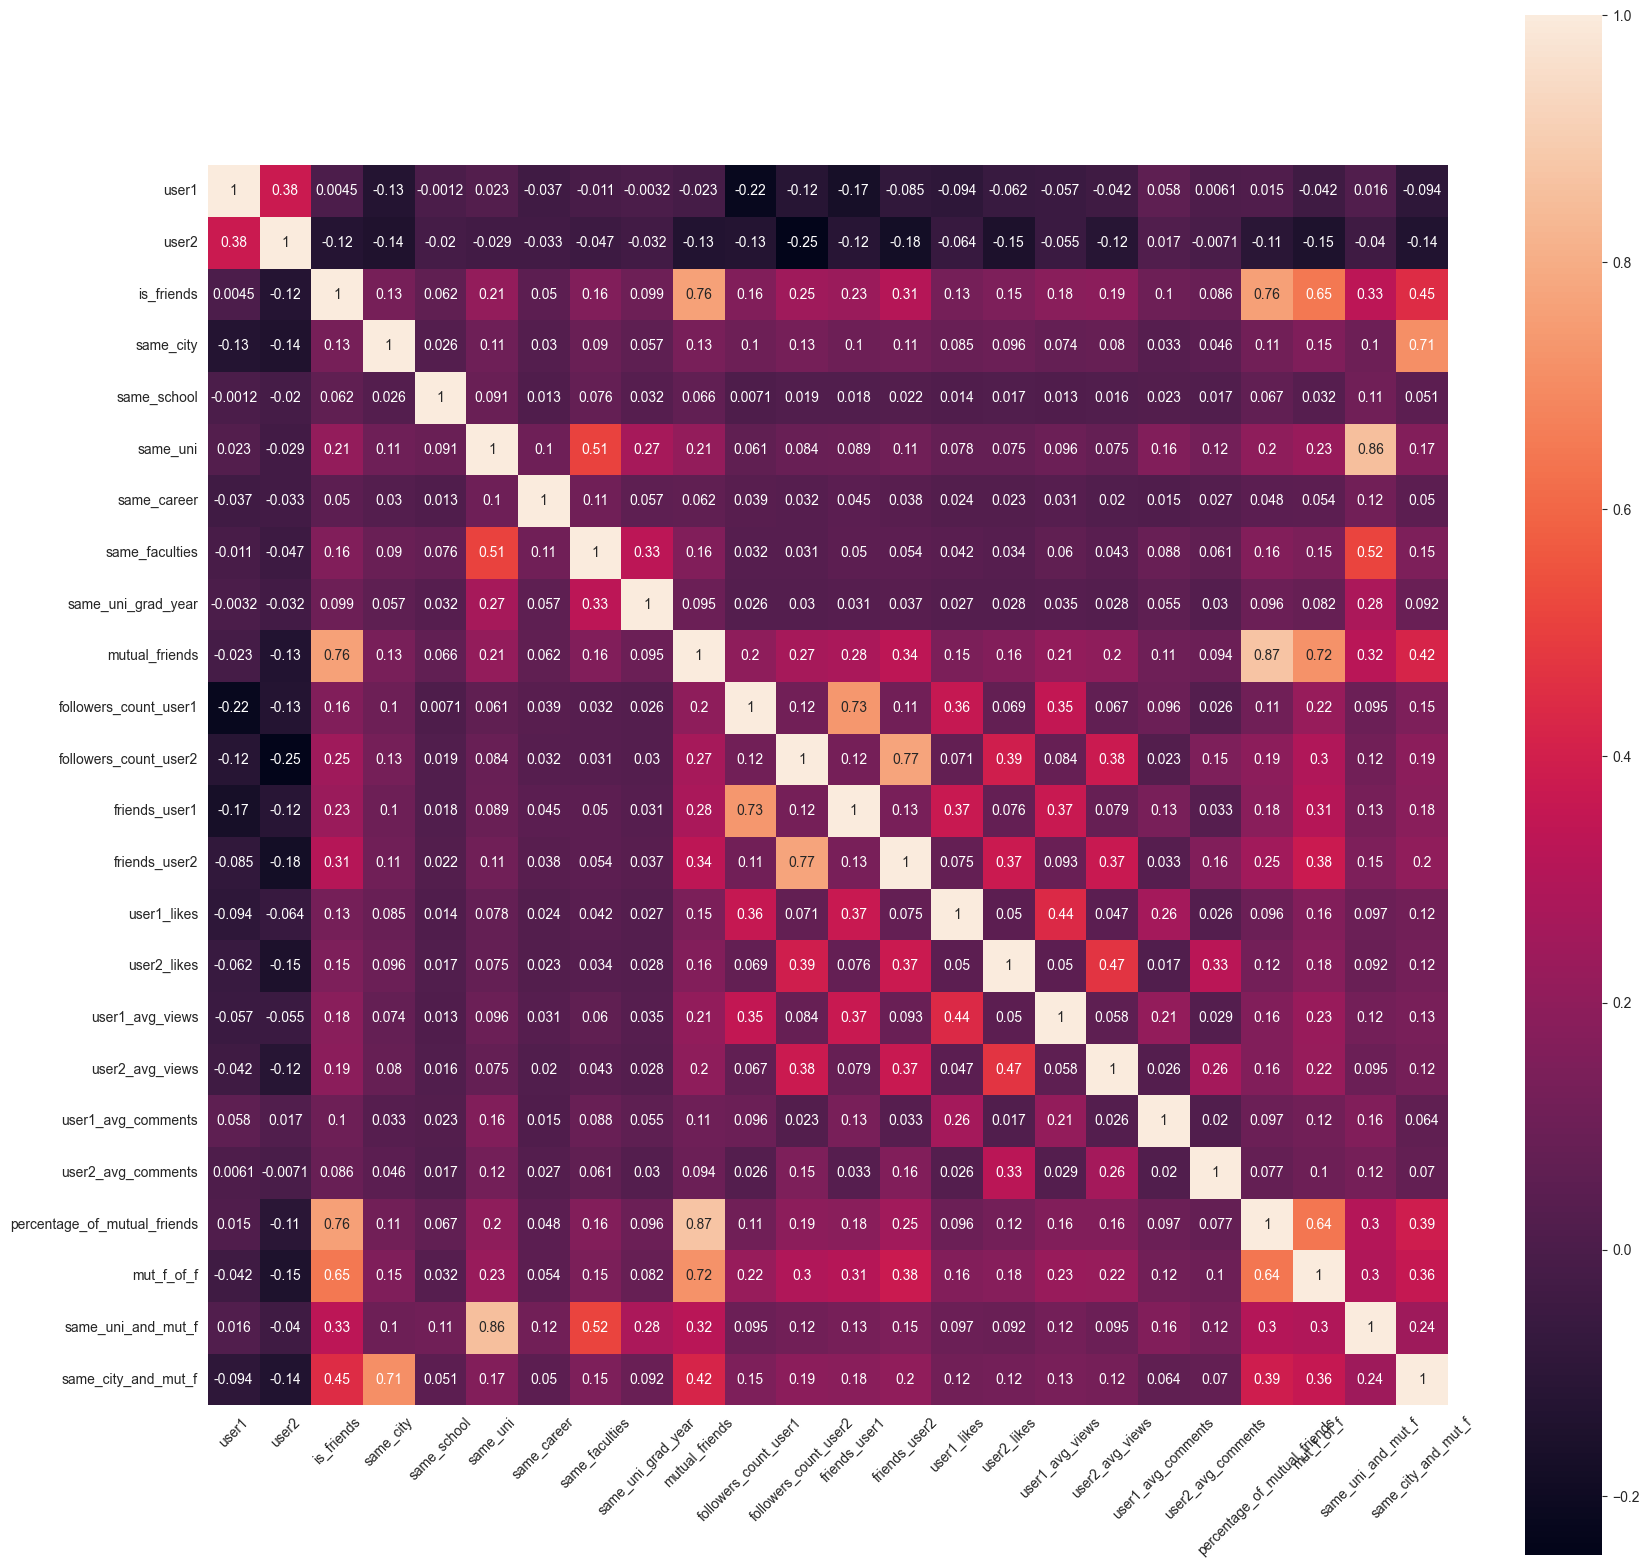

In [89]:
heatmap(test_data)